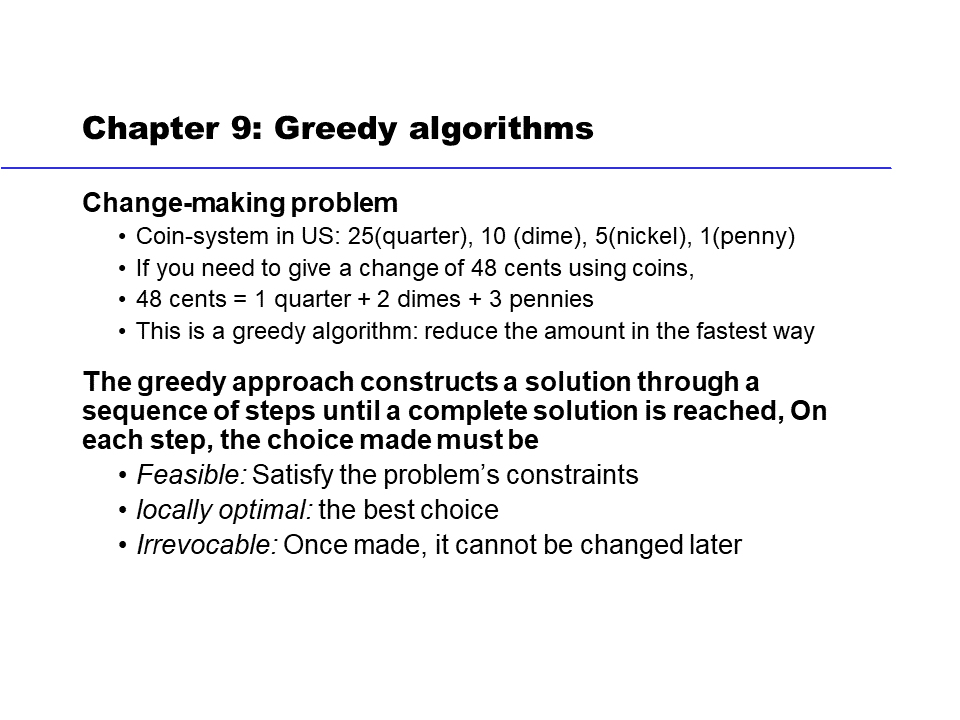

In [6]:
#imports
import numpy as np
from graphviz import Digraph
from graphviz import Graph
import random
from IPython.display import Image
import numpy as np
from IPython.core.display import display, HTML

[0, 1, 2, 3, 4]
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 0 0 0]]
[[0 0 1 0 0]
 [0 0 0 0 0]
 [1 0 0 1 0]
 [0 0 1 0 0]
 [0 0 0 0 0]]
[[0 1 1 0 0]
 [1 0 0 0 0]
 [1 0 0 1 0]
 [0 0 1 0 0]
 [0 0 0 0 0]]
[[0 1 1 0 0]
 [1 0 0 0 1]
 [1 0 0 1 0]
 [0 0 1 0 0]
 [0 1 0 0 0]]
adding random edges...
[[0 1 1 0 0]
 [1 0 0 0 1]
 [1 0 0 1 0]
 [0 0 1 0 0]
 [0 1 0 0 0]]
[[0 1 1 0 0]
 [1 0 0 0 1]
 [1 0 0 1 0]
 [0 0 1 0 0]
 [0 1 0 0 0]]
[[0 1 1 0 0]
 [1 0 0 0 1]
 [1 0 0 1 0]
 [0 0 1 0 0]
 [0 1 0 0 0]]
[[0 1 1 0 0]
 [1 0 0 0 1]
 [1 0 0 1 0]
 [0 0 1 0 0]
 [0 1 0 0 0]]
[[0 1 1 0 0]
 [1 0 0 0 1]
 [1 0 0 1 0]
 [0 0 1 0 0]
 [0 1 0 0 0]]
[[0 1 1 0 0]
 [1 0 0 0 1]
 [1 0 0 1 0]
 [0 0 1 0 0]
 [0 1 0 0 0]]
[[0 1 1 0 0]
 [1 0 0 0 1]
 [1 0 0 1 0]
 [0 0 1 0 0]
 [0 1 0 0 0]]
[[0 1 1 0 0]
 [1 0 0 0 1]
 [1 0 0 1 0]
 [0 0 1 0 0]
 [0 1 0 0 0]]
[[0 1 1 0 0]
 [1 0 0 0 1]
 [1 0 0 1 0]
 [0 0 1 0 0]
 [0 1 0 0 0]]
[[0 1 1 0 0]
 [1 0 0 0 1]
 [1 0 0 1 0]
 [0 0 1 0 0]
 [0 1 0 0 0]]
[[0 1 1 0 0]
 [1 0 0 0 1]
 [1 0 0 1 0

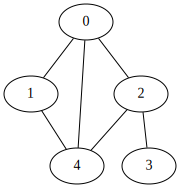

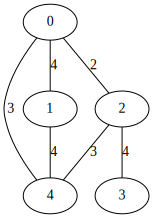

In [7]:
def random_connected_graph(n, adj_prob=0.2, debug=False):
    A = np.zeros((n,n),dtype=np.int32)
    labels = [ x for x in range(0,n) ] # list comprehension -- read like { x | x in {0..n-1} }

    if debug:
        print(labels)
    
    rlbls = labels[:] #copy lists
    random.shuffle(rlbls) 
    
    #connect the digraph (weakly)
    for i in range(0, len(rlbls)-1):
        A[rlbls[i],rlbls[i+1] ] =1
        A[rlbls[i+1],rlbls[i] ] =1
        if debug:
            print(A)
    
    if debug:
        print('adding random edges...')
    #randomly add edges
    for r in labels:
        for c in labels:
            if random.random() <= adj_prob:
                A[r,c] = 1
                A[c,r] = 1
            if debug:
                print(A)
    return A

A = random_connected_graph(5,debug=True)

def draw_graph(G,diffG=None):
    dot = Graph()
    
    labels = [ x for x in range(0, G.shape[0]) ]
    
    for l in labels:
        dot.node(str(l))
        
    for r in labels:
        for c in labels:
            if G[r,c]>0 and r<=c:
                dot.edge(str(r),str(c))
                
    if diffG is not None:
        for r in labels:
            for c in labels:
                if diffG[r,c]>0 and G[r,c] == 0:
                    attribs = {'style':'dashed',}
                    dot.edge(str(r),str(c),**attribs)

    display(dot)
    
    


def graph_labels(G):
    return [ x for x in range(0, G.shape[0]) ]

def zero_diagonal(G):
    labels = graph_labels(G)
    for l in labels:
        G[l,l]=0
    return G

inf = np.iinfo(np.int32).max # yes, kind of like a global variable...

def randomly_weight_graph(G,low,high):
    labels = [ x for x in range(0, G.shape[0]) ]
    for r in labels:
        for c in labels:
            if r<=c and G[r,c] == 1:
                wt = random.randint(low,high)
                G[r,c] = wt
                G[c,r] = wt
            elif G[r,c] == 0:
                G[r,c] = inf
                
def draw_weighted_graph(G,diffG=None,highlightG=None):
    dot = Graph()
    
    labels = graph_labels(G)
    
    for l in labels:
        dot.node(str(l))
        
    for r in labels:
        for c in labels:
            if G[r,c]!=inf and r<=c:
                attrs = {'label':str(G[r,c])}
                if highlightG is not None and highlightG[r,c]!=inf:
                    if G[r,c] != highlightG[r,c]:
                        attrs['label'] = str(G[r,c])+"=>"+str(highlightG[r,c])
                    attrs["color"] = "maroon"
                    attrs["penwidth"] = str(5)
                dot.edge(str(r),str(c),**attrs)
                
    if diffG is not None:
        for r in labels:
            for c in labels:
                if diffG[r,c]>0 and G[r,c] == 0:
                    attribs = {'style':'dashed',}
                    dot.edge(str(r),str(c),**attribs)

    display(dot)

def display_as_table( lists ):
    tbl = '''<table>'''
    for xs in lists:
        tbl += "<tr>"
        for x in xs:
            tbl += "<td>" + str(x) + "</td>"
        tbl += "</tr>"
    tbl += '''</table>'''
    
    display(HTML(tbl))
    
#print('\u221e')

zero_diagonal(A)
draw_graph(A)

WG = A.copy()
randomly_weight_graph(WG,1,5)
draw_weighted_graph(WG)

In [8]:
def weighted_adj_mat_2_adj_list(AM):
    lbls = graph_labels(AM)
    adj_list = []
    for r in lbls:
        adj_list.append([])
        for c in lbls:
            if AM[r,c] != inf:
                adj_list[r].append( (c,AM[r,c]) )
    return adj_list

def weighted_adj_list_2_adj_mat(AL):
    labels = [l for l in range(0,len(AL))]
    n = len(labels)
    AM = np.ones((n,n),dtype=np.int32)
    AM.fill(inf)
    for r in range(0,n):
        for (c,d) in AL[r]:
            AM[r,c] = d
            AM[c,r] = d
    return AM

ALWG = weighted_adj_mat_2_adj_list(WG)

print(ALWG)

display_as_table(ALWG)

[[(1, 4), (2, 2), (4, 3)], [(0, 4), (4, 4)], [(0, 2), (3, 4), (4, 3)], [(2, 4)], [(0, 3), (1, 4), (2, 3)]]


## Prim's for Minimum Spanning Tree

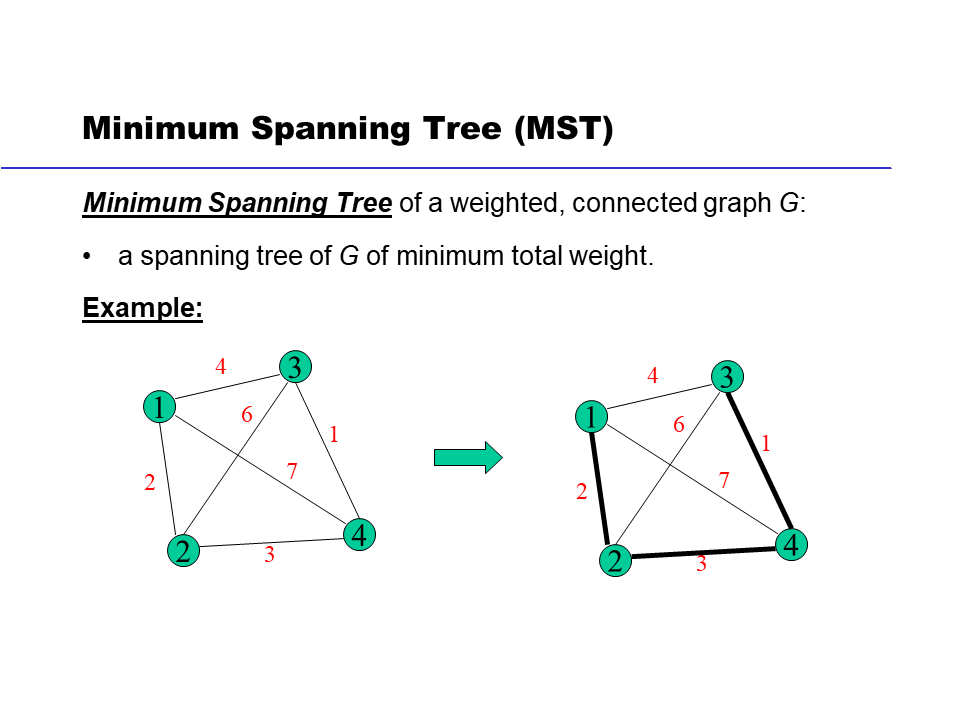

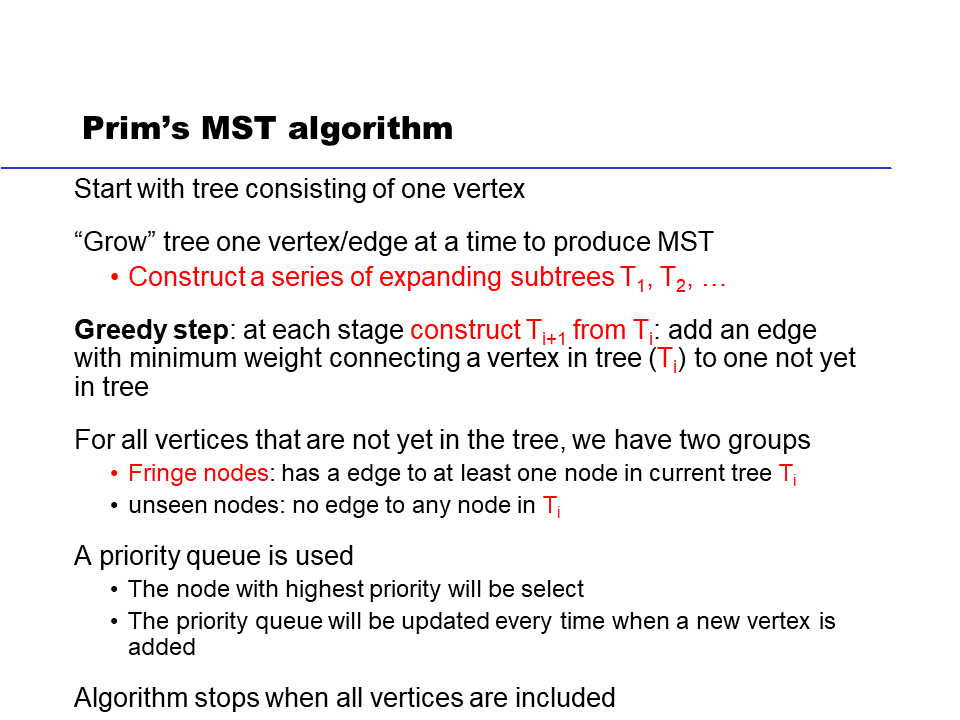

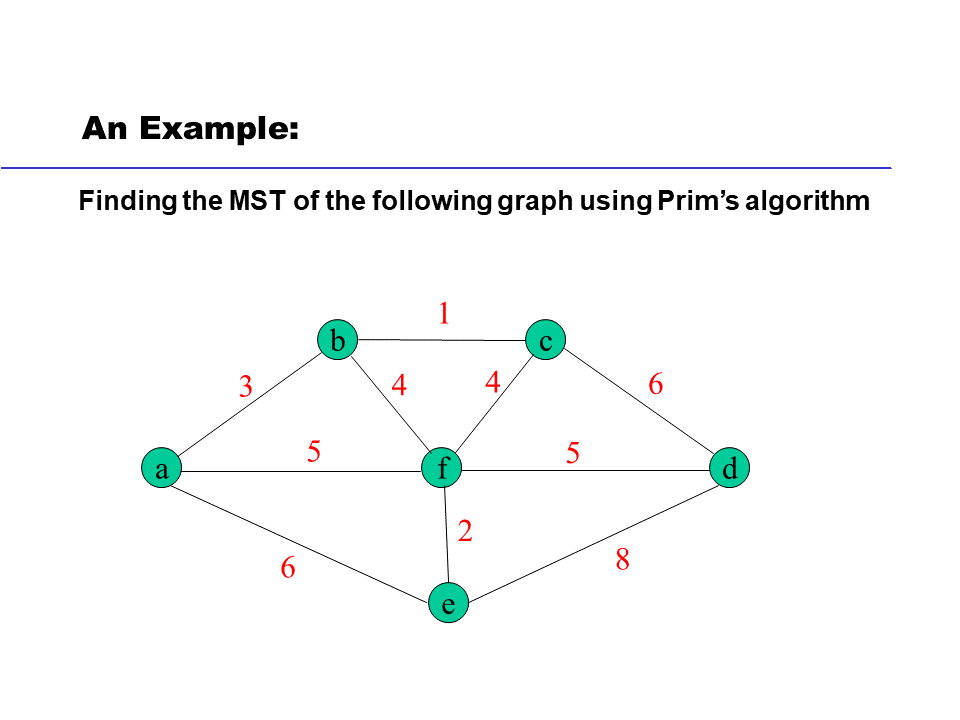

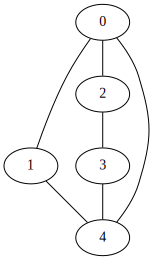

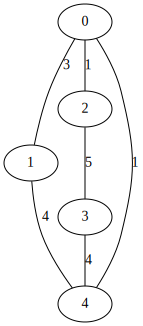

appended
appended
appended
[(1, 2, 0, False), (1, 4, 0, False), (3, 1, 0, False)]
(1, 2, 0, False)


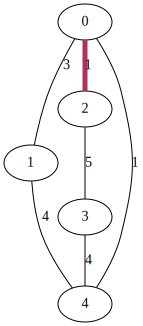

appended
appended
appended
[(1, 4, 0, False), (3, 1, 0, False), (5, 3, 2, False)]
(1, 4, 0, False)


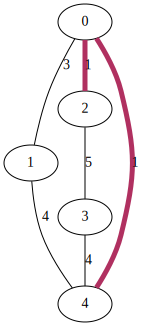

appended
appended
[(3, 1, 0, False), (4, 3, 4, False)]
(3, 1, 0, False)


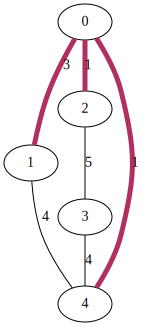

appended
[(4, 3, 4, False)]
(4, 3, 4, False)


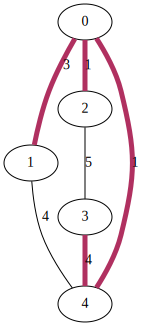

In [9]:
A = random_connected_graph(5)

zero_diagonal(A)
draw_graph(A)

WG = A.copy()
randomly_weight_graph(WG,1,5)

draw_weighted_graph(WG)
ALWG = weighted_adj_mat_2_adj_list(WG)

#input: a connected, undirected Adjacency List Weighted Graph
#output: a minimum spanning tree as an Adjacency List Weighted Graph 
def prims(alwg, debug = False):
    found = { l:(inf,None,False) for l in range(len(alwg))} #
    #start at label 0, arbitrarily, and grow tree
    found[0] = (0,0,True) # order is distance,next-hop, in_tree
    tree = [[] for _ in alwg] # tree consists of _edges_
    for (node,dist) in alwg[0]: #add all edges from node-0
        found[node] = (dist,0,False) #note flip of dist postion
    #main loop
    for _ in range(1,len(alwg)):
        fringe=[]  
        for (lbl,(d,nbor,inTree)) in found.items(): 
            if not inTree and d<inf:
                fringe.append( (d,lbl,nbor,inTree) )
                print('appended')
        fringe.sort()
        if debug:
            print( fringe)
            
        (d,lbl,nbor,inTree) = fringe[0]
        print(fringe[0])
        tree[lbl].append((nbor,d))
        tree[nbor].append((lbl,d))
        
        if debug:
            mat_tree = weighted_adj_list_2_adj_mat(tree)
            wg = weighted_adj_list_2_adj_mat(alwg)
            draw_weighted_graph(wg,highlightG=mat_tree)
        found[lbl] = (d,nbor,True)
        for (node,dist) in alwg[lbl]:
            (n_dist, _, inTree) = found[node]
            if dist < n_dist and inTree == False:
                found[node]= (dist,lbl,False)
    return tree
        
        
              
    
mst = prims(ALWG,debug=True)   


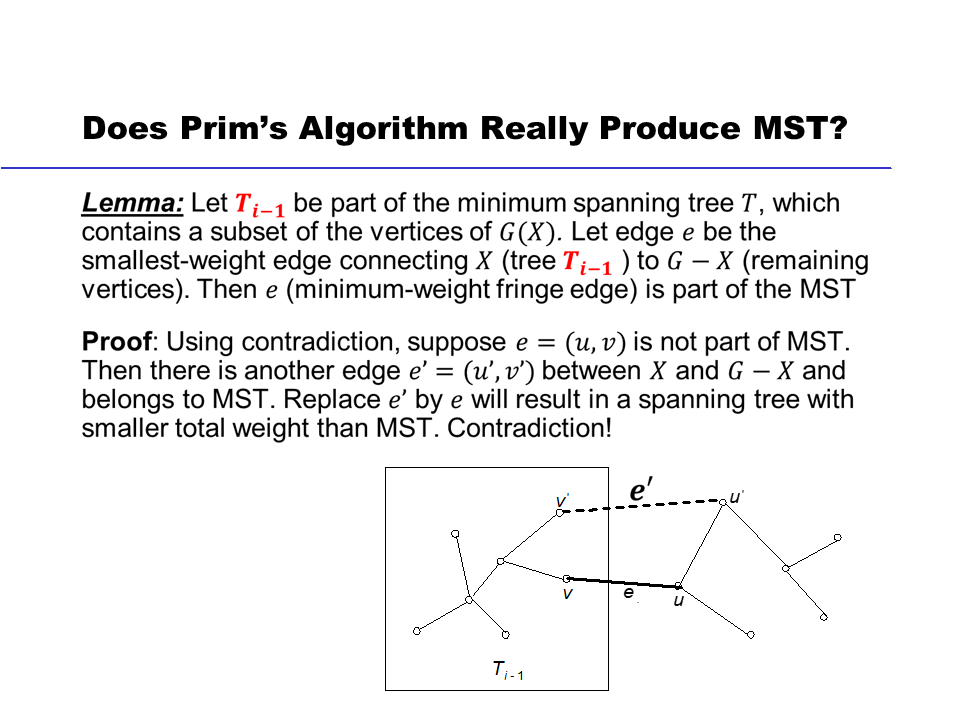

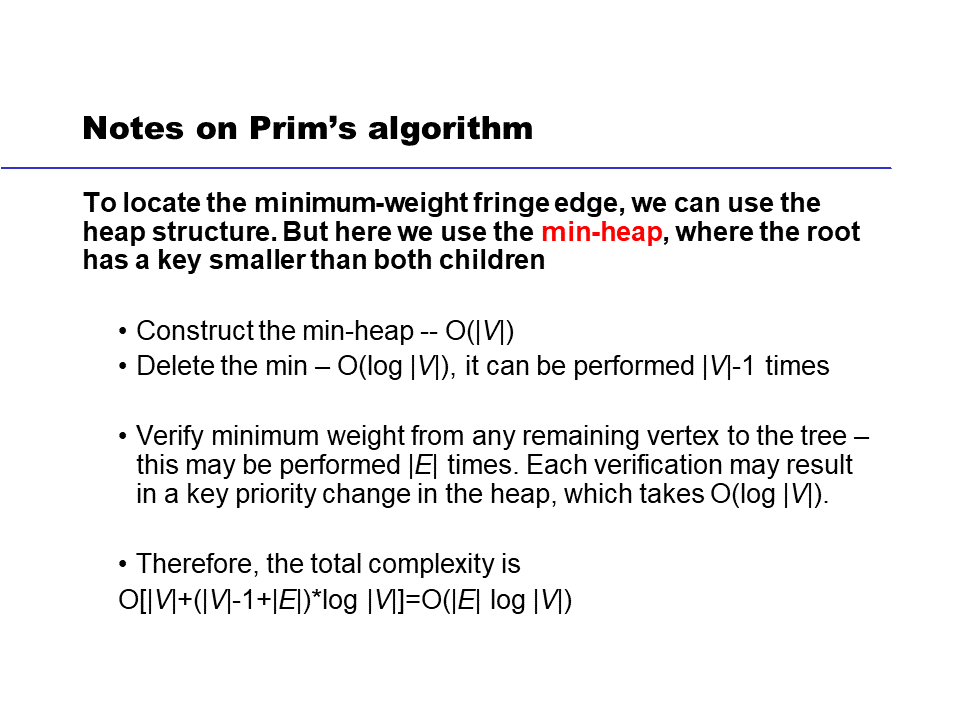

(note: the code above and below is not an efficient implementation because of repeated sorting and using a list and not a heap -- adjusting the values of items *in the heap* is tricky)

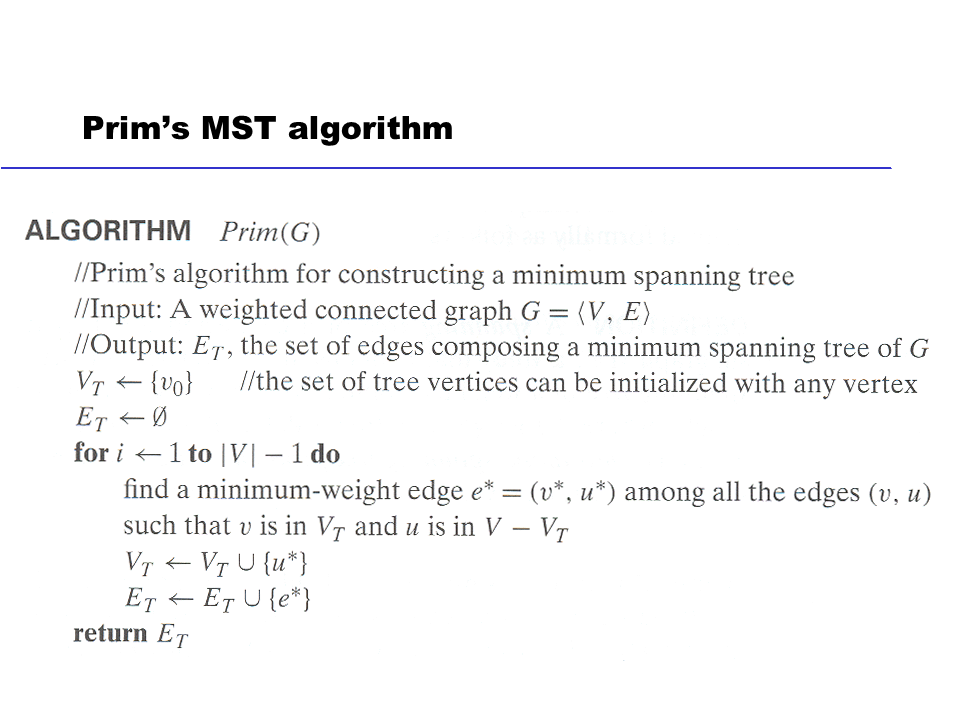

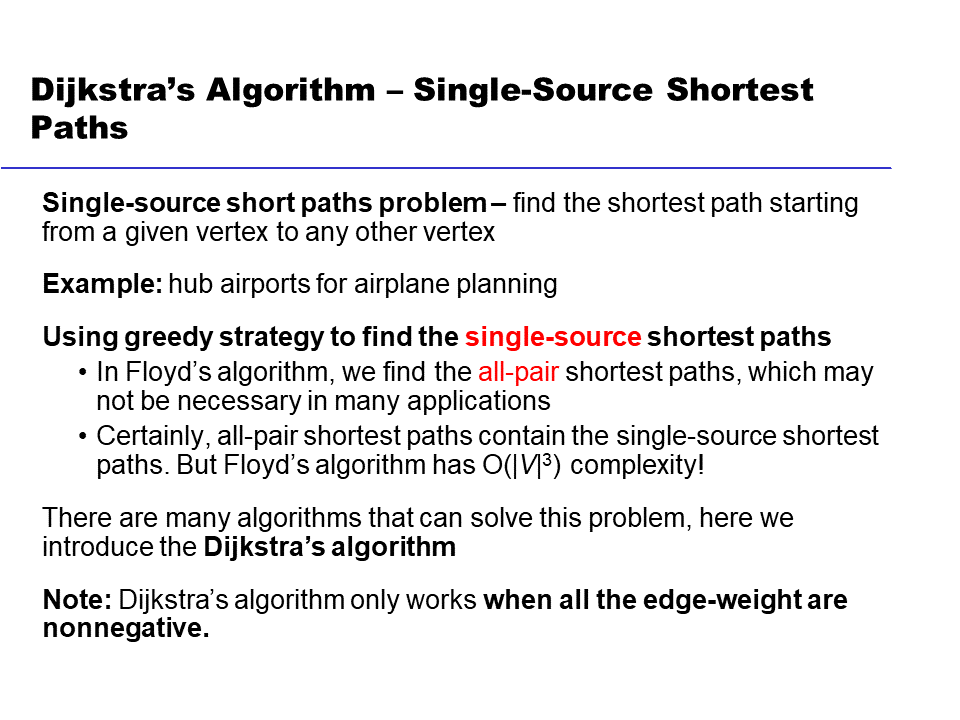

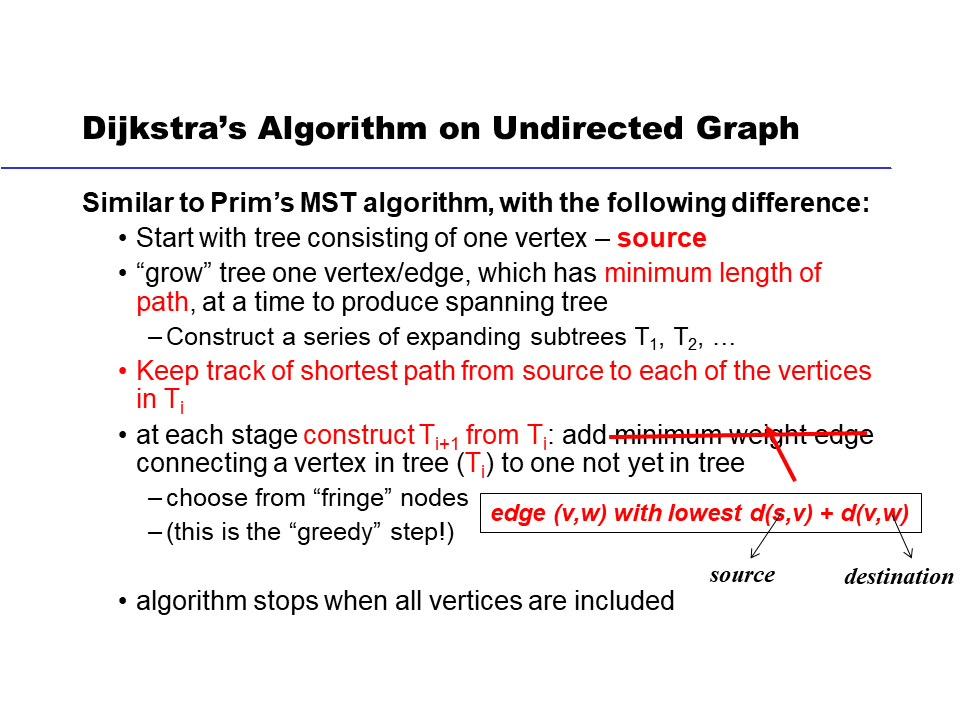

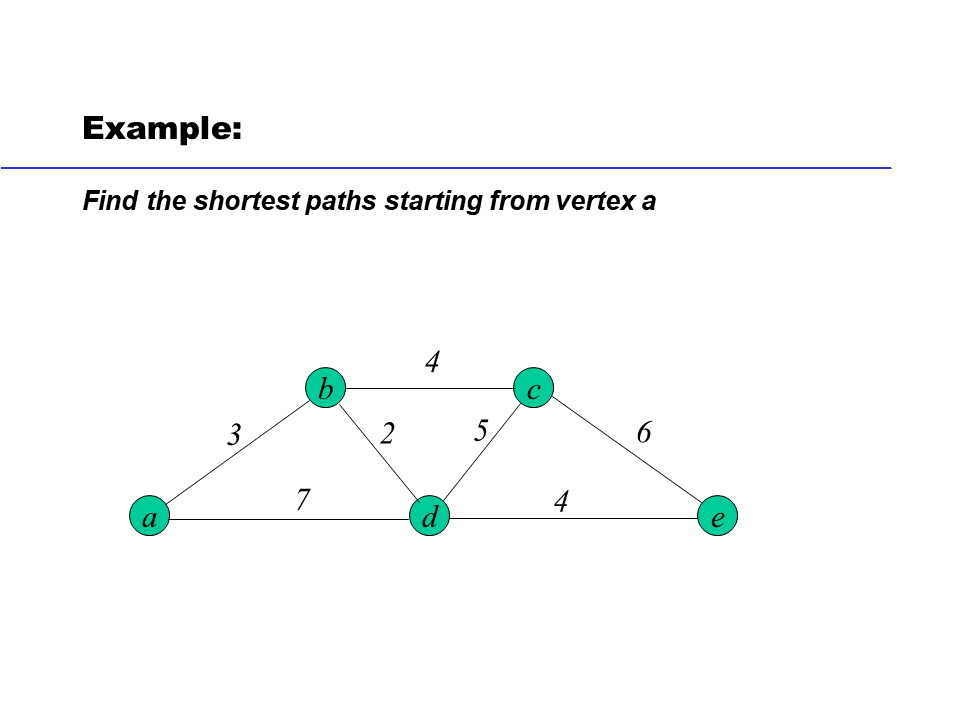

appended
appended
appended
[(1, 2, 0, False), (1, 4, 0, False), (3, 1, 0, False)]
(1, 2, 0, False)


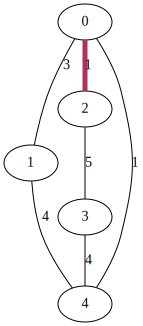

appended
appended
appended
[(1, 4, 0, False), (3, 1, 0, False), (6, 3, 2, False)]
(1, 4, 0, False)


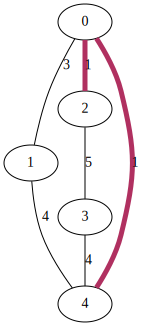

appended
appended
[(3, 1, 0, False), (5, 3, 4, False)]
(3, 1, 0, False)


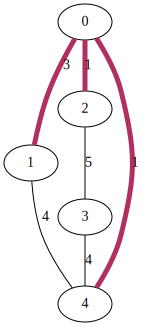

appended
[(5, 3, 4, False)]
(5, 3, 4, False)


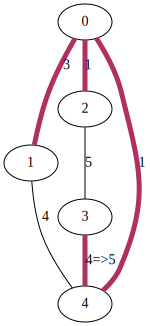

In [10]:
def dijkstras(alwg, debug = False):
    found = { l:(inf,None,False) for l in range(len(alwg))} #
    #start at label 0, arbitrarily, and grow tree
    found[0] = (0,0,True) # order is distance,next-hop, in_tree
    tree = [[] for _ in alwg] # tree consists of _edges_
    for (node,dist) in alwg[0]: #add all edges from node-0
        found[node] = (dist,0,False) #note flip of dist postion
    #main loop
    for _ in range(1,len(alwg)):
        fringe=[]  
        for (lbl,(d,nbor,inTree)) in found.items(): 
            if not inTree and d<inf:
                fringe.append( (d,lbl,nbor,inTree) )
                print('appended')
        fringe.sort()
        if debug:
            print( fringe)
            
        (d,lbl,nbor,inTree) = fringe[0]
        print(fringe[0])
        tree[lbl].append((nbor,d))
        tree[nbor].append((lbl,d))
        
        if debug:
            mat_tree = weighted_adj_list_2_adj_mat(tree)
            wg = weighted_adj_list_2_adj_mat(alwg)
            draw_weighted_graph(wg,highlightG=mat_tree)
        found[lbl] = (d,nbor,True)
        for (node,dist) in alwg[lbl]:
            (n_dist, _, inTree) = found[node]
            pathdist = dist+d
            if pathdist < n_dist and inTree == False:
                found[node]= (pathdist,lbl,False)
    return tree
        
        
              
    
shortest_path_tree = dijkstras(ALWG,debug=True)   

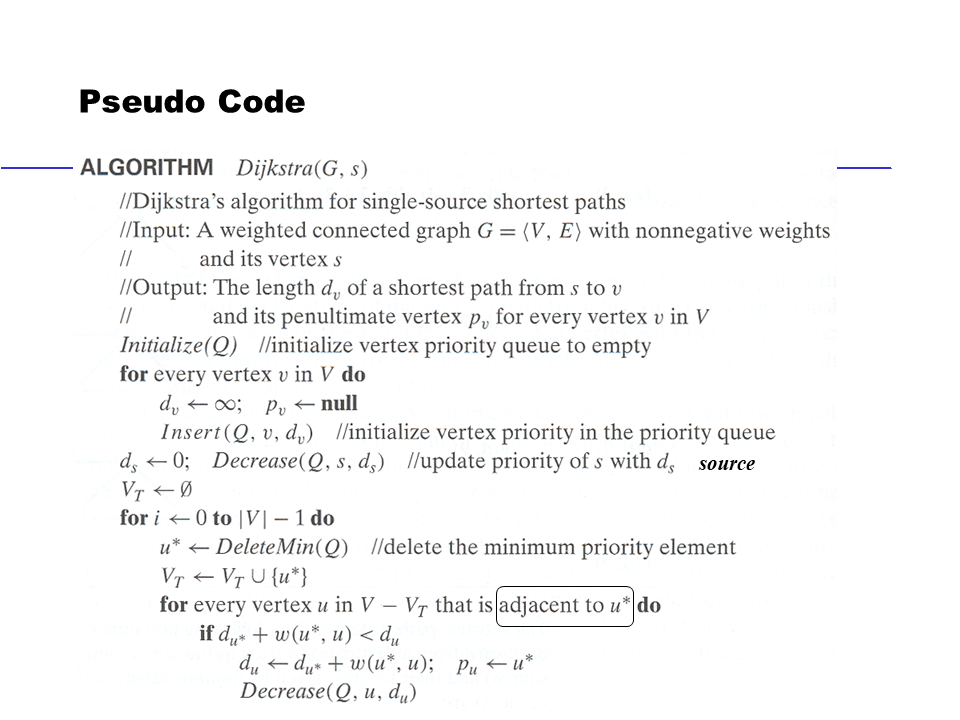

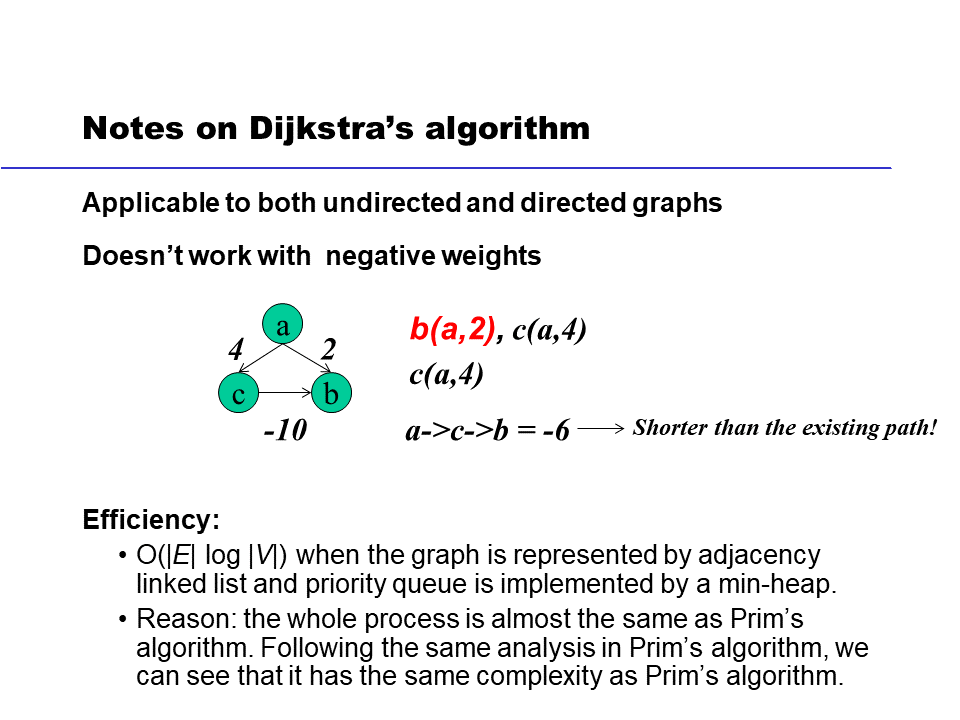

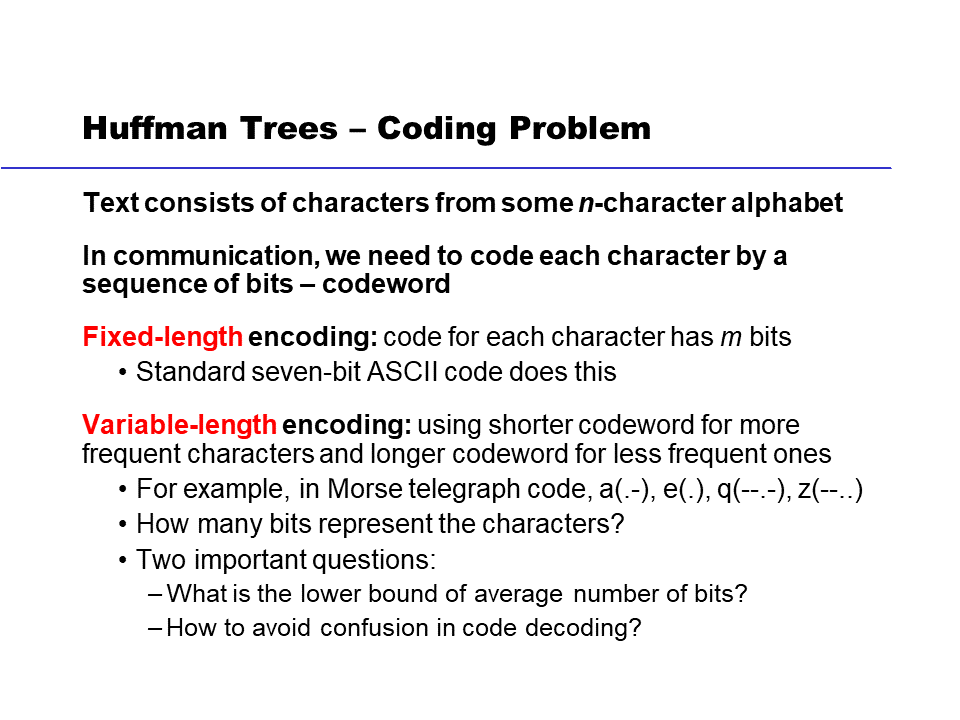

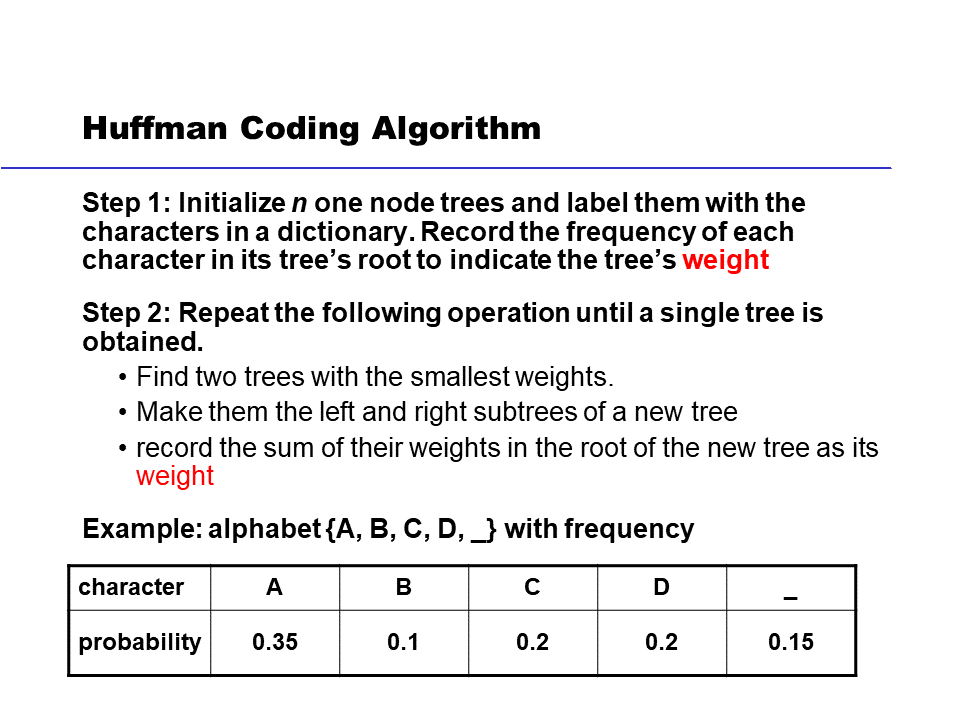

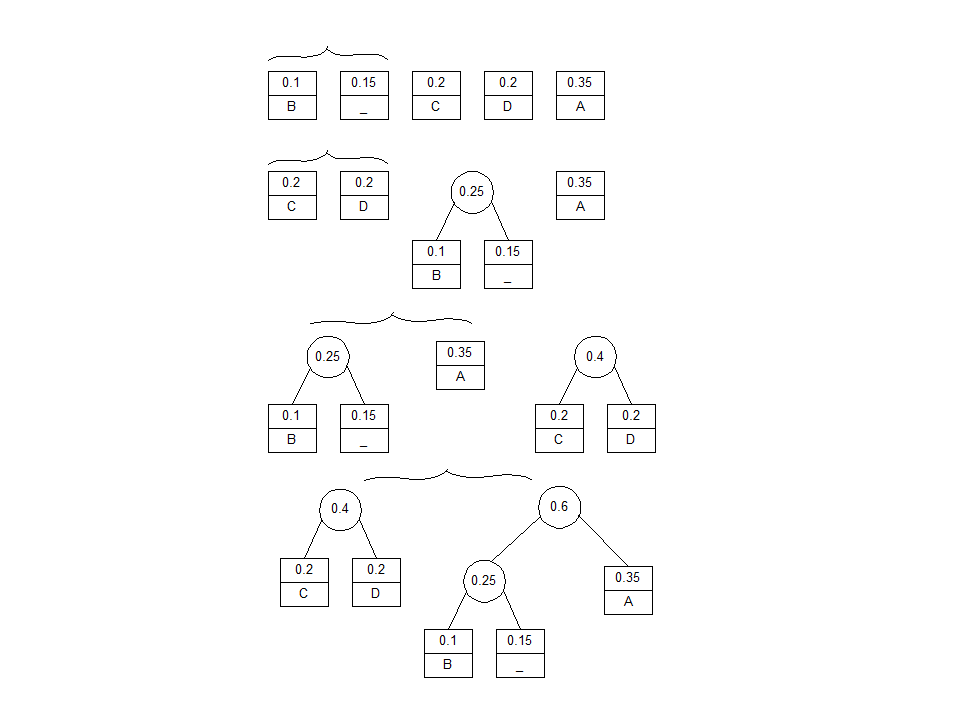

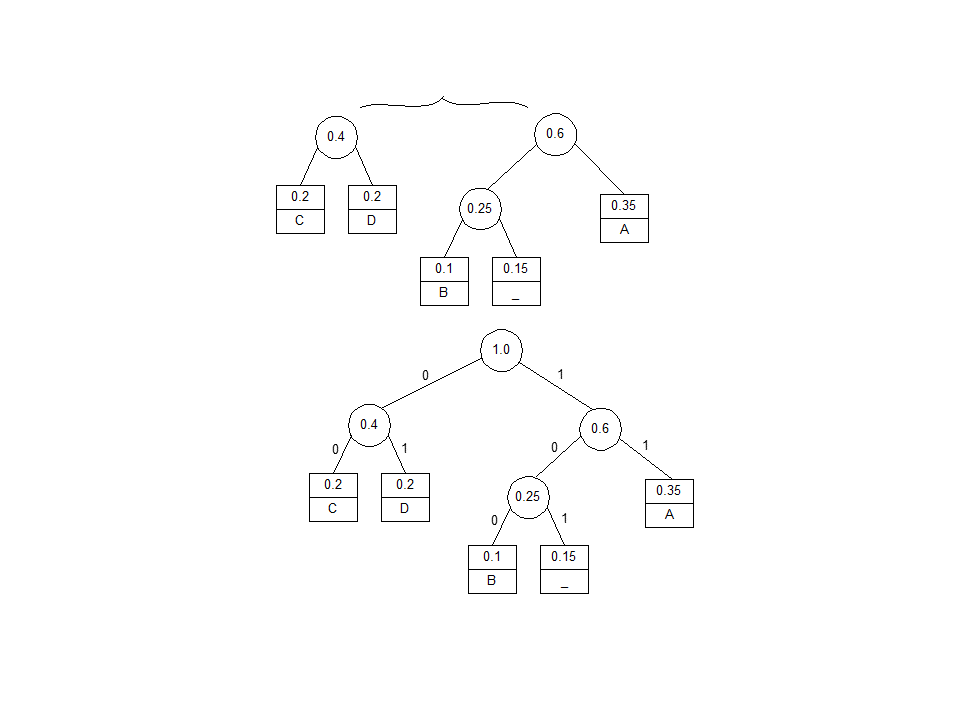


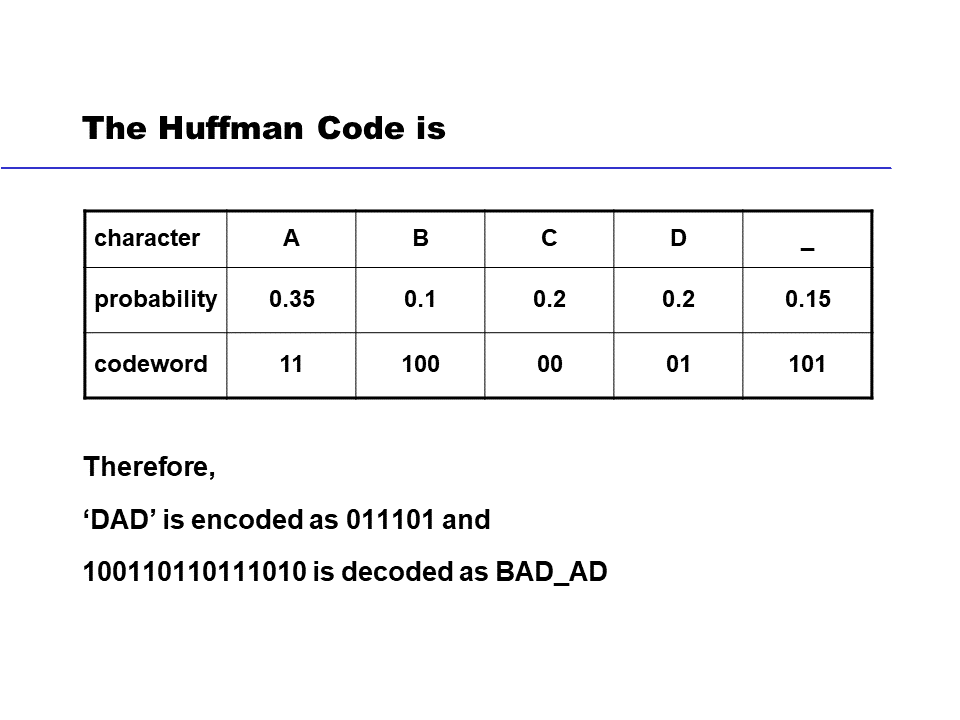

In [26]:
class HuffNode:
    def __init__(self,left=None,right=None,freq=None,char=None):
        self.char = char
        if left is None:
            self.freq = freq
        else:
            self.left = left
            self.right = right
            self.freq = left.freq + right.freq

    def is_char_node(self):
        return self.char is not None
    
    def is_internal_node(self):
        return self.char is None
    
a = HuffNode(freq=0.2,char="a")
b = HuffNode(freq=0.3,char="b")
x = HuffNode(left=a,right=b)

#input: list of (char,freq) pairs
#ouptut: list of (char,code) pairs
def HuffCoding(cfs):
    def sort_huff_tree_list(hns):
        hns.sort(key = lambda hn:hn.freq)
        
    #build list of trees
    hns = [HuffNode(char=c,freq=f) for (c,f) in cfs]
    sort_huff_tree_list(hns)
    while(len(hns)>1):
        left=hns[0]
        right=hns[1]
        hns = hns[2:]
        lr = HuffNode(left=left,right=right)
        hns.append(lr)
        
    def label_hn_leaves(htree,string):
        if htree.is_char_node():
            return [(htree.char,string)]
        else:
            left_lbls = label_hn_leaves(htree.left,string+'0')
            right_lbls = label_hn_leaves(htree.right,string+'1')
            return left_lbls+right_lbls
        
    return label_hn_leaves(hns[0],"")
    
result = HuffCoding([('A',0.35),('B',0.1),('C',0.2),('D',0.2),('_',0.15)])
result.sort(key = lambda pair: pair[0])
print(result)

[('A', '10'), ('B', '110'), ('C', '00'), ('D', '01'), ('_', '111')]
